# Teoría cuántica básica, Observables y Medidas

### 1. Simule el primer sistema cuántico descrito en la sección 4.1.

El sistema consiste en una partícula confinada a un conjunto discreto de posiciones en una línea. El simulador debe permitir especificar el número de posiciones y un vector ket de estado asignando las amplitudes.

1. El sistema debe calcular la probabilidad de encontrarlo en una posición en particular.

2. El sistema si se le da otro vector Ket debe buscar la probabilidad de transitar del primer vector al segundo.

In [37]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display

def normalizar(ket):
    norm = np.linalg.norm(ket)
    if norm == 0:
        raise ValueError("El vector ket no puede tener norma cero.")
    return ket / norm

def prob_posicion(ket, posicion):
    return np.abs(ket[posicion])**2

def prob_transicion(ket1, ket2):
    braket = np.vdot(ket2, ket1)
    return np.abs(braket)**2


def procesar_calculos():
    try:
        ket_psi = np.array([complex(x) for x in ket_input_psi.value.split(',')])
        ket_psi = normalizar(ket_psi) 
        
        if ket_input_phi.value:
            ket_phi = np.array([complex(x) for x in ket_input_phi.value.split(',')])
            ket_phi = normalizar(ket_phi)  
            trans_prob = prob_transicion(ket_psi, ket_phi)
            output_trans_prob.value = f"Probabilidad de transición de ket_psi a ket_phi: {trans_prob}"
            output_prob_pos.value = "" 
        else:
            posicion = int(pos_input.value)
            prob_pos = prob_posicion(ket_psi, posicion)
            output_prob_pos.value = f"Probabilidad en posición {posicion}: {prob_pos}"
            output_trans_prob.value = "" 
    except Exception as e:
        output_prob_pos.value = f"Error: {str(e)}"
        output_trans_prob.value = ""

ket_input_psi = widgets.Text(value='0.5+0.5j, 0.5, 0.5, 0.5j', description='ket_psi:')
ket_input_phi = widgets.Text(value='', description='ket_phi:')
pos_input = widgets.Text(value='2', description='Posición:')

calcular_button = widgets.Button(description="Calcular")

calcular_button.on_click(procesar_calculos)

output_prob_pos = widgets.Label(value="")
output_trans_prob = widgets.Label(value="")

display(ket_input_psi, ket_input_phi, pos_input, calcular_button, output_prob_pos, output_trans_prob)


Text(value='0.5+0.5j, 0.5, 0.5, 0.5j', description='ket_psi:')

Text(value='', description='ket_phi:')

Text(value='2', description='Posición:')

Button(description='Calcular', style=ButtonStyle())

Label(value='')

Label(value='')

### 2. Complete los retos de programación del capítulo 4.

In [64]:
import numpy as np
import matplotlib.pyplot as plt

def normalizar(ket):
    norm = np.linalg.norm(ket)
    if norm == 0:
        raise ValueError("El vector ket no puede tener norma cero.")
    return ket / norm

def prob_transicion(ket1, ket2):
    braket = np.vdot(ket2, ket1)
    return np.abs(braket)**2

def es_hermitiana(matriz):
    return np.allclose(matriz, matriz.conj().T)

def valor_esperado(matriz, ket):
    return np.vdot(ket, np.dot(matriz, ket))

def varianza(matriz, ket):
    media = valor_esperado(matriz, ket)
    ket_cuadrado = np.dot(matriz, ket)
    media_cuadrado = valor_esperado(matriz, ket_cuadrado)
    return media_cuadrado - np.abs(media)**2

def es_unitaria(matriz):
    return np.allclose(np.dot(matriz.conj().T, matriz), np.eye(matriz.shape[0]))




1. Amplitud de transición. El sistema puede recibir dos vectores y calcular la probabilidad de transitar de el uno al otro después de hacer la observación.

In [39]:
def calcular_probabilidad_transicion(ket1, ket2):
    ket1_normalizado = normalizar(ket1)
    ket2_normalizado = normalizar(ket2)
    
    probabilidad = prob_transicion(ket1_normalizado, ket2_normalizado)
    
    return probabilidad


2. Ahora con una matriz que describa un observable y un vector ket, el sistema revisa que la matriz sea hermitiana, y si lo es, calcula la media y la varianza del observable en el estado dado.

In [40]:
def calcular_observable(matriz, ket):
    ket_normalizado = normalizar(ket)
    
    if matriz.shape != (len(ket_normalizado), len(ket_normalizado)):
        raise ValueError("La matriz debe ser cuadrada y del mismo tamaño que el ket.")
    
    if not es_hermitiana(matriz):
        raise ValueError("La matriz no es hermitiana.")
    
    media = valor_esperado(matriz, ket_normalizado)
    var = varianza(matriz, ket_normalizado)
    
    return media, var

3. El sistema calcula los valores propios del observable y la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación.

In [41]:
def calcular_valores_propios_probabilidades(matriz_observable, ket):
    if not np.allclose(matriz_observable, matriz_observable.conj().T):
        raise ValueError("La matriz no es hermitiana.")
    
    valores_propios, vectores_propios = np.linalg.eigh(matriz_observable) 

    ket_normalizado = normalizar(ket)

    probabilidades = []
    for vector_propio in vectores_propios.T:
        vector_propio_normalizado = normalizar(vector_propio)
        probabilidad = prob_transicion(ket_normalizado, vector_propio_normalizado)
        probabilidades.append(probabilidad)

    return valores_propios, probabilidades

4. Se considera la dinámica del sistema. Ahora con una serie de matrices en el sistema calcula el estado final a partir de un estado inicial.

In [42]:
def evolucionar_estado(estado_inicial, matrices_unitarias):
    estado_final = estado_inicial
    for U in matrices_unitarias:

        if not es_unitaria(U):
            raise ValueError("Una de las matrices no es unitaria.")

        estado_final = np.dot(U, estado_final)

        estado_final = normalizar(estado_final)
    
    return estado_final

### 3. Realice los siguientes problemas e incluyalos como ejemplos

4.3.1 Find all the possible states the system described in Exercise 4.2.2 can transition into after a measurement has been carried out.

In [54]:
estado0 = np.array([[1],[0]])

h=1
sx = h/2*np.array([[0,1],
                   [1,0]])

estado1 = np.dot(sx,estado0)
print(f"El estado resultante despues que Sx actua sobre el estado inicial es:", estado1)
estado1 = normalizar(estado1)

up = np.array([[1], [0]])    
down = np.array([[0], [1]]) 

p_up = calcular_probabilidad_transicion(up, estado1)
p_down = calcular_probabilidad_transicion(down, estado1)

print(f"Probabilidad de transitar al estado up: {p_up} ")
print(f"Probabilidad de transitar al estado down: {p_down} ")


El estado resultante despues que Sx actua sobre el estado inicial es: [[0. ]
 [0.5]]
Probabilidad de transitar al estado up: 0.0 
Probabilidad de transitar al estado down: 1.0 


4.3.2 Perform the same calculations as in the last example, using Exercise 4.3.1. Then draw the probability distribution of the eigenvalues as in the previous example.

Probabilidad para el vector del valor propio 1: 0.5000000000000001
Probabilidad para el vector del valor propio 2: 0.5000000000000001


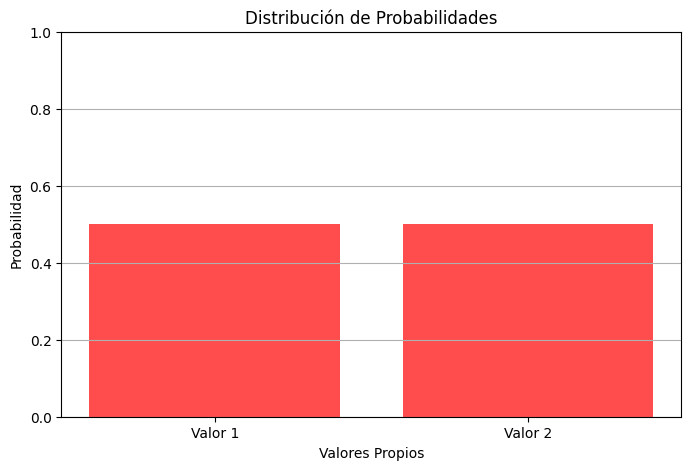

In [66]:
estado0 = np.array([[1],[0]])

h=1
sx = h/2*np.array([[0,1],
                   [1,0]])

valores, probabilidades = calcular_valores_propios_probabilidades(sx, estado0)

n = 0
for i in probabilidades:
    print(f"Probabilidad para el vector del valor propio {n + 1}: {i}")
    n = n + 1

plt.figure(figsize=(8, 5))
plt.bar(range(1, len(valores) + 1), probabilidades, tick_label=[f"Valor {i+1}" for i in range(len(valores))], color='red', alpha=0.7)
plt.xlabel('Valores Propios')
plt.ylabel('Probabilidad')
plt.title('Distribución de Probabilidades')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

4.4.1 Verify that

$$ U = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} $$   
$$ W = \begin{bmatrix} \sqrt{2}/2 & \sqrt{2}/2 \\ \sqrt{2}/2 & -\sqrt{2}/2 \end{bmatrix} $$ 

are unitary matrices. Multiply them and verify that their product is also unitary.


In [70]:
u = np.array([[0,1],[1,0]])
w = np.array([[np.sqrt(2)/2,np.sqrt(2)/2],[np.sqrt(2)/2,-np.sqrt(2)/2]])

if es_unitaria(u):
    print("La matriz u es unitaria.")
else:
    print("La matriz u no es unitaria.")

if es_unitaria(w):
    print("La matriz w es unitaria.")
else:
    print("La matriz w no es unitaria.")

uw = np.dot(u, w)

if es_unitaria(uw):
    print("El producto uw es unitaria.")
else:
    print("El producto uw no es unitaria.")



La matriz u es unitaria.
La matriz w es unitaria.
El producto uw es unitaria.


4.4.2 Go back to Example 3.3.2 (quantum billiard ball), keep the same initial state vector [1, 0, 0, 0]T, but change the unitary map to

\begin{bmatrix} 
0 & 1/\sqrt{2} & 1/\sqrt{2} & 0 \\ 
i/\sqrt{2} & 0 & 0 & 1/\sqrt{2} \\ 
1/\sqrt{2} & 0 & 0 & i/\sqrt{2} \\ 
0 & 1/\sqrt{2} & -1/\sqrt{2} & 0 \end{bmatrix}

Determine the state of the system after three time steps. What is the chance of the quantum ball to be found at point 3?

In [71]:
estado0 = np.array([[1],[0],[0],[0]])

matriz = np.array([
    [0, 1/np.sqrt(2), 1/np.sqrt(2), 0],
    [1j/np.sqrt(2), 0, 0, 1/np.sqrt(2)],
    [1/np.sqrt(2), 0, 0, 1j/np.sqrt(2)],
    [0, 1/np.sqrt(2), -1/np.sqrt(2), 0]
])

print("Clic 1: ")
estado1 = np.dot(matriz,estado0)
print(estado1)
print("Clic 2: ")
estado2 = np.dot(matriz,estado1)
print(estado2)
print("Clic 3: ")
estado3 = np.dot(matriz,estado2)
print(estado3)

norma = np.linalg.norm(estado3)

print(f"La probabilidad de que la bola se encuentre en el punto 3 es: {(estado3[3][0])**2/norma**2}")

Clic 1: 
[[0.        +0.j        ]
 [0.        +0.70710678j]
 [0.70710678+0.j        ]
 [0.        +0.j        ]]
Clic 2: 
[[ 0.5+0.5j]
 [ 0. +0.j ]
 [ 0. +0.j ]
 [-0.5+0.5j]]
Clic 3: 
[[ 0.        +0.j        ]
 [-0.70710678+0.70710678j]
 [ 0.        +0.j        ]
 [ 0.        +0.j        ]]
La probabilidad de que la bola se encuentre en el punto 3 es: 0j


4.5.2

Write down the generic state vector for the system of two particles
with spin. Generalize it to a system with n particles (this is important: it will be the physical realization for quantum registers!).

El producto tensorial entre dos estados $|U_{1}\rangle$ y $|U_{2}\rangle$, que definen el estado de cada partícula, nos permite establecer el vector de estado. Si consideramos que existen en el sistema los estados $|U_{1}\rangle$ y $|U_{2}\rangle$, el vector que describe el estado del sistema es:

\begin{equation}
|X\rangle = |U_{1}\rangle \otimes |U_{2}\rangle
\end{equation}

Ahora, teniendo en cuenta la ecuación (1), si suponemos un sistema con más partículas, un sistema de $n$ partículas, podemos utilizar esta ecuación para generar un vector que describa el estado general del sistema de la siguiente manera:

Dado un sistema de $n$ partículas, sean $U_{0}, U_{1}, U_{2}, \ldots, U_{n-1}$ las partículas del sistema, y sea $|X\rangle$ la ecuación que describe el estado total del sistema, entonces $|X\rangle$ se define como:

\begin{equation}
|X\rangle = |U_{0}\rangle \otimes |U_{1}\rangle \otimes |U_{2}\rangle \otimes \dots \otimes |U_{n}\rangle
\tag{2}
\end{equation}
